<a href="https://colab.research.google.com/github/ROzenSaglam/COOKapp/blob/main/API_image_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import argparse
import json
import os
import time
import requests
import tqdm
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
!pip install pexels_api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pexels_api import API

In [4]:
api_key = '563492ad6f9170000100000151c6565e89284b1fb4b1eefa2fb5b814'


In [5]:
#@title First way of making an API call

headers = {"Content-Type": "application/json",
           "Authorization":"{0}".format(api_key)}
api_url = "https://api.pexels.com/v1/search?query=recipe&page=2&per_page=50"
response = requests.get(api_url, headers = headers).json()


In [6]:
photos = response['photos']

photos

[{'id': 7525172,
  'width': 3986,
  'height': 5991,
  'url': 'https://www.pexels.com/photo/delicious-homemade-cake-on-round-stand-7525172/',
  'photographer': 'SHVETS production',
  'photographer_url': 'https://www.pexels.com/@shvets-production',
  'photographer_id': 30353109,
  'avg_color': '#CAC7C4',
  'src': {'original': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg',
   'large2x': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940',
   'large': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&h=650&w=940',
   'medium': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&h=350',
   'small': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&h=130',
   'portrait': 'https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&fit=crop&h=1200&w=

In [7]:
for key in photos:
  print(key['src']['small'])

https://images.pexels.com/photos/7525172/pexels-photo-7525172.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/6941028/pexels-photo-6941028.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/4022140/pexels-photo-4022140.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/6287219/pexels-photo-6287219.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/5946966/pexels-photo-5946966.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/6287261/pexels-photo-6287261.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/6287581/pexels-photo-6287581.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/7144445/pexels-photo-7144445.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/7144977/pexels-photo-7144977.jpeg?auto=compress&cs=tinysrgb&h=130
https://images.pexels.com/photos/4198376/pexels-photo-4198376.jpeg?auto=compress&cs=tinysrgb&h=130
https://im

In [8]:
for key in photos:
  url = key['src']['small']
  id_split = key['url'].split("-")[-1]
  filename = id_split.split("/")[0]+".jpeg"
  print(filename)

7525172.jpeg
6941028.jpeg
4022140.jpeg
6287219.jpeg
5946966.jpeg
6287261.jpeg
6287581.jpeg
7144445.jpeg
7144977.jpeg
4198376.jpeg
4198183.jpeg
4940719.jpeg
6294381.jpeg
6287554.jpeg
4198417.jpeg
4040701.jpeg
4210806.jpeg
6294354.jpeg
6375547.jpeg
6287517.jpeg
6287295.jpeg
7809735.jpeg
7144974.jpeg
6157039.jpeg
6287224.jpeg
6287283.jpeg
6294395.jpeg
7525161.jpeg
5907829.jpeg
6210848.jpeg
6287539.jpeg
6957998.jpeg
4199060.jpeg
4792402.jpeg
6941022.jpeg
6287530.jpeg
7525114.jpeg
7525159.jpeg
7525182.jpeg
5947062.jpeg
6061743.jpeg
6287522.jpeg
6287472.jpeg
6957997.jpeg
7262889.jpeg
4199096.jpeg
4022182.jpeg
4197822.jpeg
4202323.jpeg
6621423.jpeg


Downloading images to a Google Drive folder

In [9]:

for key in photos:
  url = key['src']['small']
  id_split = key['url'].split("-")[-1]
  filename = id_split.split("/")[0]+".jpeg"
  response = requests.get(url, headers = headers, stream = True)
  if response.status_code == 200:
    with open(os.path.join('drive','MyDrive','api_photo','image',filename), 'wb') as f:
      f.write(response.content)


Labeling photos
---



In [10]:
!pip install opencv-python tensorflow labelme


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 11.4 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.2.1-py3-none-any.whl size=1466726 sha256=d86c3ed6b4ac3836f67586839f9ef6f970dcb95f24744aa335aa463c21068fb4
  Stored in directory: /root/.cache/pip/wheels/de/44/e2/f05944b4d1af582c7d28ab2d1372a57f63b24576f28a4aa0c3
Successfully built labelme


In [ ]:
!labelme

 Import TF and Deps

In [ ]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

Load Image into TF Data Pipeline

In [ ]:
images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','api_photo','image','*.jpeg'), shuffle = False)




In [ ]:
images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','api_photo','image','*.jpeg'), shuffle = False)
def load_image(x):
  img = tf.io.read_file(x)
  byte_img = tf.image.decode_jpeg(img)
  return byte_img


 View Raw Images with Matplotlib

In [ ]:
fig,ax = plt.subplots(ncols =4, figsize = (20,20))
for idx, image in enumerate(images):
  ax[idx].imshow(image)
plt.show()

Moving matching labels:

In [ ]:
for folder in ['train','test','val']:
  for file in os.listdir(os.path.join('drive','MyDrive','api_photo',folder, 'images')):

    filename = file.split(".")[0] + ".json"
    existing_filepath = os.path.join('drive','MyDrive','api_photo','labels',filename)
    if os.path.exists(existing_filepath):
      new_filepath = os.path.join('drive','MyDrive','api_photo',folder,'labels',filename)
      os.replace(existing_filepath, new_filepath)


Setup Albumentations Transform Pipeline

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.HorizontalFlip(p=0.5),
             alb.RandomBrightnessContrast(p=0.3)],
             bbox_params=alb.BboxParams(format='albumentations', label_fields = ['class_labels']))


Test an Image & Annotation

In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/drive/MyDrive/api_photo/train/images/1029572.jpeg")
img

array([[[ 88, 176, 216],
        [ 92, 178, 220],
        [ 84, 176, 219],
        ...,
        [ 50,  26,  61],
        [ 51,  26,  64],
        [ 54,  30,  65]],

       [[ 87, 175, 216],
        [ 85, 173, 214],
        [ 86, 174, 215],
        ...,
        [ 48,  24,  58],
        [ 52,  27,  65],
        [ 57,  31,  71]],

       [[ 77, 171, 214],
        [ 72, 167, 207],
        [ 83, 171, 212],
        ...,
        [ 54,  30,  65],
        [ 59,  34,  72],
        [ 51,  28,  66]],

       ...,

       [[ 46,  35,  75],
        [ 44,  40,  76],
        [ 54,  46,  86],
        ...,
        [ 38,  14,  46],
        [ 38,  14,  46],
        [ 39,  15,  45]],

       [[ 43,  32,  65],
        [ 41,  32,  65],
        [ 53,  47,  88],
        ...,
        [ 39,  15,  45],
        [ 38,  14,  46],
        [ 40,  16,  48]],

       [[ 44,  35,  68],
        [ 46,  36,  72],
        [ 50,  48,  90],
        ...,
        [ 37,  14,  42],
        [ 39,  16,  44],
        [ 38,  14,  46]]

In [ ]:
with open("/content/drive/MyDrive/api_photo/train/labels/1029572.json", 'r') as f:
  label = json.load(f)

get the coordinates

In [ ]:
label['shapes'][0]['points']

[[2582.0, 59.0], [5162.0, 3419.0]]

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[2582.0, 59.0, 5162.0, 3419.0]

normalize the coordinates by dividing x with width and y with height of the image

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(3456, 5184, 3)

In [ ]:
max(img.shape)

5184

In [ ]:
y_normalizer = img.shape[0]
x_normalizer = img.shape[1]

In [ ]:
coords = list(np.divide( coords, [x_normalizer,y_normalizer,x_normalizer,y_normalizer]))
coords

[0.498070987654321,
 0.01707175925925926,
 0.9957561728395061,
 0.9892939814814815]

try augmentation pipeline

In [ ]:
aug = augmentor(image = img, bboxes=[coords], class_labels = ['face'])


NameError: ignored

In [ ]:
aug['bboxes']

[(0.004243827160493874,
  0.01707175925925926,
  0.501929012345679,
  0.9892939814814815)]

In [ ]:
aug['bboxes'][0]

(0.004243827160493874,
 0.01707175925925926,
 0.501929012345679,
 0.9892939814814815)

In [ ]:
aug['bboxes'][0][2:]

(0.501929012345679, 0.9892939814814815)

In [ ]:
cv2.rectangle(aug['image'],
              tuple(np.multiply(aug['bboxes'][0][:2], [max(img.shape),max(img.shape)]).astype(int)),
              tuple(np.multiply(aug['bboxes'][0][2:], [max(img.shape),max(img.shape)]).astype(int)),
              (0,255,0),4)

array([[[  5,   0,  15],
        [  2,   0,  14],
        [  1,   0,  11],
        ...,
        [ 33, 120, 161],
        [ 41, 122, 162],
        [ 37, 120, 158]],

       [[  7,   0,  21],
        [  3,   0,  15],
        [  0,   0,   8],
        ...,
        [ 35, 119, 157],
        [ 34, 118, 157],
        [ 36, 119, 158]],

       [[  2,   0,  16],
        [  9,   0,  22],
        [  5,   0,  15],
        ...,
        [ 32, 116, 155],
        [ 22, 112, 150],
        [ 26, 116, 157]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   0,  35],
        [  0,   0,  25],
        [  0,   0,  25]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  4,   0,  37],
        [  0,   0,  15],
        [  0,   0,  15]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   0,  39],
        [  0,   0,  22],
        [  0,   0,  18]]

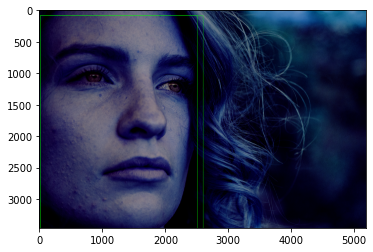

In [ ]:
plt.imshow(aug['image'])

BUILD AUGMENTATION PIPELINE

In [ ]:
for folder in ['train','test','val']:
  for files in os.listdir(os.path.join('drive','MyDrive','api_photo',folder, 'images')):

    filename = files.split(".")[0]
    img = cv2.imread(os.path.join('drive','MyDrive','api_photo',folder, 'images',files))
    filepath = os.path.join('drive','MyDrive','api_photo',folder, 'labels',f'{filename}.json')
    coords = [0,0,0.000001,0.000001]

    if os.path.exists(filepath):
      with open(filepath, 'r') as f:
        label = json.load(f)


      coords[0] = label['shapes'][0]['points'][0][0]
      coords[1] = label['shapes'][0]['points'][0][1]
      coords[2] = label['shapes'][0]['points'][1][0]
      coords[3] = label['shapes'][0]['points'][1][1]

    y_normalizer = img.shape[0]
    x_normalizer = img.shape[1]

    coords = list(np.divide( coords, [x_normalizer,y_normalizer,x_normalizer,y_normalizer]))

    try:
      for x in range(60):
        aug = augmentor(image = img, bboxes=[coords], class_labels = ['face'])
        cv2.imwrite(os.path.join('drive','MyDrive','api_photo','aug_data',folder,'images', f'{filename}_{x}.jpeg'), aug['image'])
        annotation = {}
        annotation['image'] = files
        if os.path.exists(filepath):
          if len(aug['bboxes']) == 0:
            annotation['bbox'] = [0,0,0,0]
            annotation['class'] = 0
          else:
            annotation['bbox'] = aug['bboxes'][0]
            annotation['class'] = 1
        else:
          annotation['bbox'] = [0,0,0,0]
          annotation['class'] = 0

        with open(os.path.join('drive','MyDrive','api_photo','aug_data',folder,'labels', f'{filename}_{x}.json'), 'w') as f:
          json.dump(annotation, f)
    except Exception as e:
      print(e)






name 'augmentor' is not defined
name 'augmentor' is not defined


KeyboardInterrupt: ignored

Load Augmented Images to Tensorflow Dataset

In [ ]:
def load_image(x):
  img = tf.io.read_file(x)
  byte_img = tf.image.decode_jpeg(img)
  return byte_img

In [ ]:
def normalize_image(image):
    return tf.image.resize(image, (500,500))

In [ ]:
try:
  train_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','api_photo','aug_data','train', 'images','*.jpeg'), shuffle = False)
  train_images = train_images.map(load_image)
  train_images = train_images.map(lambda x: tf.image.resize(x, (1500,1500)))
  train_images = train_images.map(lambda x: x/255)

except Exception as e:
  print(e)

In [ ]:
try:
  test_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','api_photo','aug_data','test', 'images','*.jpeg'), shuffle = False)
  test_images = test_images.map(load_image)
  test_images = test_images.map(lambda x: tf.image.resize(x, (1500,1500)))
  test_images = test_images.map(lambda x: x/255)

except Exception as e:
  print(e)

In [ ]:
try:
  val_images = tf.data.Dataset.list_files(os.path.join('drive','MyDrive','api_photo','aug_data','val', 'images','*.jpeg'), shuffle = False)
  val_images = val_images.map(load_image)
  val_images = val_images.map(lambda x: tf.image.resize(x, (1500,1500)))
  val_images = val_images.map(lambda x: x/255)

except Exception as e:
  print(e)

In [ ]:
len(train_images), len(test_images), len(val_images)

(1860, 720, 420)

In [ ]:
type(train_images)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [ ]:
val_images.as_numpy_iterator().next()

array([[[0.47025508, 0.4035884 , 0.30162764],
        [0.4703092 , 0.39187783, 0.28599548],
        [0.47531885, 0.39688748, 0.29100513],
        ...,
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ]],

       [[0.4539837 , 0.387317  , 0.2843157 ],
        [0.47062537, 0.392194  , 0.28631163],
        [0.47913113, 0.40069976, 0.2948174 ],
        ...,
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ]],

       [[0.4602933 , 0.3936266 , 0.2838227 ],
        [0.47168407, 0.39325267, 0.28737032],
        [0.47839445, 0.39996308, 0.29408073],
        ...,
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ],
        [0.8039216 , 0.8509804 , 0.8509804 ]],

       ...,

       [[0.14901961, 0.15686275, 0.15294118],
        [0.14163412, 0.15686275, 0.15294118],
        [0.15294118, 0

Prepare Labels

6.1Build Label Loading function

In [ ]:
def load_label(label_path):
  with open(label_path.numpy(), 'r', encoding = 'utf-8') as f:
    label = json.load(f)

  return [label['class'], label['bbox']]

6.2. Load labels to tensorflow dataset

In [ ]:
label_paths= []
for partition in ['train', 'test', 'val']:
  label_path = os.path.join('drive','MyDrive','api_photo','aug_data', partition, 'labels', '*.json')
  label_paths.append(label_path)
label_paths

['drive/MyDrive/api_photo/aug_data/train/labels/*.json',
 'drive/MyDrive/api_photo/aug_data/test/labels/*.json',
 'drive/MyDrive/api_photo/aug_data/val/labels/*.json']

In [ ]:

train_labels = tf.data.Dataset.list_files(label_paths[0]).map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))
test_labels = tf.data.Dataset.list_files(label_paths[1]).map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))
val_labels = tf.data.Dataset.list_files(label_paths[2]).map(lambda x: tf.py_function(load_label, [x], [tf.uint8, tf.float16]))


In [ ]:
val_labels.as_numpy_iterator().next()

(1, array([0.286 , 0.252 , 0.6123, 0.6685], dtype=float16))

7. Combine Label and Image Samples

In [ ]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(2000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(900)
test = test.batch(8)
test = test.prefetch(4)

valid = tf.data.Dataset.zip((val_images, val_labels))
valid = valid.shuffle(500)
valid = valid.batch(8)
valid = valid.prefetch(4)

In [ ]:
valid.as_numpy_iterator().next()[1]


In [ ]:
data_samples = valid.as_numpy_iterator()
res = data_samples.next()

fig, ax =plt.subplots(ncols = 4, figsize=(20,20))
for idx in range(4):
  sample_image = res[0][idx]
  sample_coords = res[1][1][idx]

  cv2.rectangle(sample_image,
                tuple(np.multiply(sample_coords[:2], [1200,1200]).astype(int)),
                tuple(np.multiply(sample_coords[2:],[1200,1200]).astype(int)),
                (255,0,0),2)

  ax[idx].imshow(sample_image)

In [ ]:
import scipy.stats
scipy.stats.norm.pdf(2, 1, 2) - scipy.stats.norm.pdf(0.5, 1, 2)


-0.017301395019274884

In [ ]:

def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [ ]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)

    event_size = sum(generic_sample_space[outcome]
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [ ]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21),
                                 weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078